> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDB 5000 Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

The dataset that we be used for analysis contains TMDb movie data from the year 1965 to 2015. The data has 10866 rows and 21 columns. The column name and a brief description are as follows



In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
import seaborn as sns
%matplotlib inline
df = pd.read_csv('tmdb-movies.csv')

# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (This is where the data is cleaned, we check for missing and drop duplicates values!)

### Check the number of rows in each column containing null values

In [33]:
#ascertain the number of null in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Sum the numbers of duplicates and also drop duplicates

In [34]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# The code below calculated the number of duplicates, drop duplicates
sum(df.duplicated())
df.drop_duplicates(inplace=True)

### Drop extraneous columns

In [35]:
#drop irrelant columns and null value
df.drop(['imdb_id', 'original_title', 'cast', 'homepage', 'tagline', 'overview', 'keywords', 'production_companies'], axis = 1, inplace = True)
df.dropna(inplace = True)

### Change release_date data type to datetime data type

In [36]:
#change release_date data type
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            10800 non-null  int64         
 1   popularity    10800 non-null  float64       
 2   budget        10800 non-null  int64         
 3   revenue       10800 non-null  int64         
 4   director      10800 non-null  object        
 5   runtime       10800 non-null  int64         
 6   genres        10800 non-null  object        
 7   release_date  10800 non-null  datetime64[ns]
 8   vote_count    10800 non-null  int64         
 9   vote_average  10800 non-null  float64       
 10  release_year  10800 non-null  int64         
 11  budget_adj    10800 non-null  float64       
 12  revenue_adj   10800 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 1.2+ MB


In [37]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.head(2)

,id,popularity,budget,revenue,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


### Perform summary statistics

In [38]:
#The code performed a summary statistics of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10800.000000,10800.000000,1.080000e+04,1.080000e+04,10800.000000,10800.000000,10800.000000,10800.000000,1.080000e+04,1.080000e+04
mean,65576.183426,0.649455,1.471114e+07,4.006558e+07,102.189722,218.600741,5.970880,2001.289537,1.765437e+07,5.167714e+07
std,91756.079939,1.002441,3.098677e+07,1.173193e+08,30.783873,577.165055,0.933006,12.819545,3.438403e+07,1.450182e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10570.500000,0.209156,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20460.000000,0.385471,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,74725.250000,0.717508,1.564374e+07,2.455409e+07,111.250000,147.000000,6.600000,2011.000000,2.103337e+07,3.408743e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Fill Zero budget and revenue with the mean

In [39]:
#The summary statistics revealed that some columns contains zero values
#The code below replace Zero values with the mean value
df['revenue'] = df['revenue'].replace(0,df['revenue'].mean())
df['budget'] = df['budget'].replace(0,df['budget'].mean())

### Split the genres column so we can get the first value into a separate column

In [40]:
#split the fisrt value into another column named primary_genres
df[['primary_genres','other_genres']] = df['genres'].str.split('|', n = 1, expand = True)

In [41]:
#check if the operation is succesful
df.head()

,id,popularity,budget,revenue,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_genres,other_genres
0,135397,32.985763,150000000.0,1.513529e+09,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure|Science Fiction|Thriller
1,76341,28.419936,150000000.0,3.784364e+08,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure|Science Fiction|Thriller
2,262500,13.112507,110000000.0,2.952382e+08,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction|Thriller
3,140607,11.173104,200000000.0,2.068178e+09,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure|Science Fiction|Fantasy
4,168259,9.335014,190000000.0,1.506249e+09,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime|Thriller


In [42]:
#drop other_genres
df.drop(['other_genres'], axis = 1, inplace = True)
df.dropna(inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Most Popular genres!)

>Which genres are most popular from year to year?

In [46]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_genres= df['primary_genres'].value_counts().reset_index()
display(df_genres)

,index,primary_genres
0,Drama,2447
1,Comedy,2313
2,Action,1587
3,Horror,914
4,Adventure,586
5,Thriller,491
6,Documentary,424
7,Animation,398
8,Crime,380
9,Fantasy,272


>The visualization representaion of the table above

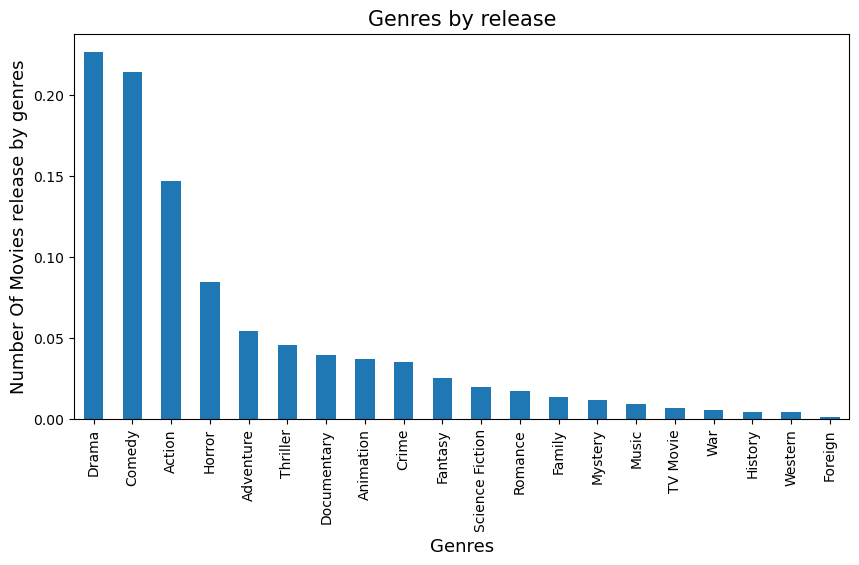

In [47]:
df['primary_genres'].value_counts('popularity').plot(kind = 'bar', figsize = (10,5));

plt.title("Genres by release",fontsize=15)
plt.xlabel('Genres',fontsize=13)
plt.ylabel("Number Of Movies release by genres",fontsize= 13);

### Research Question 2  ( What kinds of properties are associated with movies that have high revenues?!)

In [48]:
df.head(1)

,id,popularity,budget,revenue,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_genres
0,135397,32.985763,150000000.0,1.513529e+09,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action


### Revenue to Budget

Text(0, 0.5, 'Revenue')

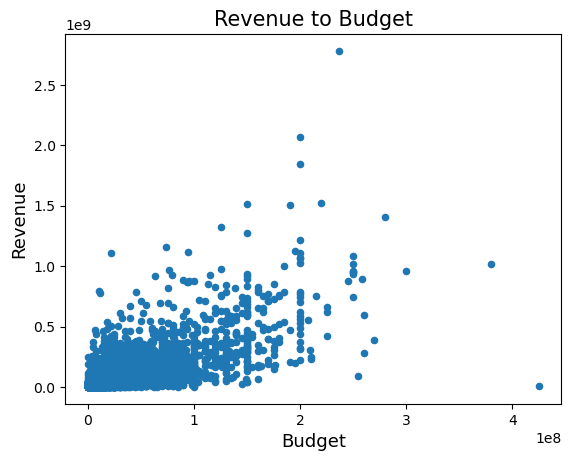

In [52]:
#The code below shows how the revenue faired against the budget
df1.plot.scatter(x = 'budget', y = 'revenue')
plt.title("Revenue to Budget",fontsize=15)
plt.xlabel('Budget',fontsize=13)
plt.ylabel("Revenue",fontsize= 13)

### Budget to Popularity

Text(0, 0.5, 'Revenue')

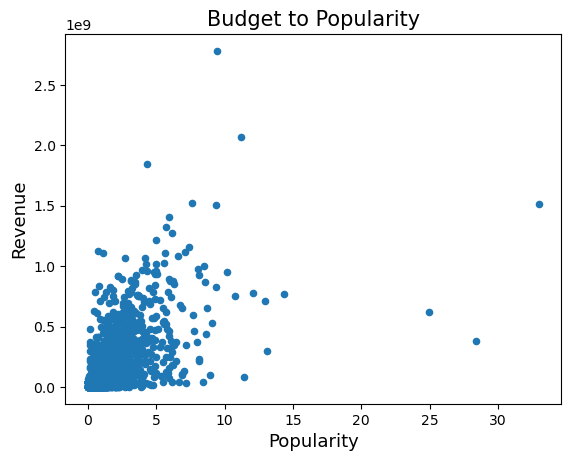

In [50]:
#The code below compare how popular a movie is to the revenue it generated  
df1.plot.scatter(x = 'popularity', y = 'revenue')
plt.title("Budget to Popularity",fontsize=15)
plt.xlabel('Popularity',fontsize=13)
plt.ylabel("Revenue",fontsize= 13)

### Revenue to Average Votes

Text(0, 0.5, 'Revenue')

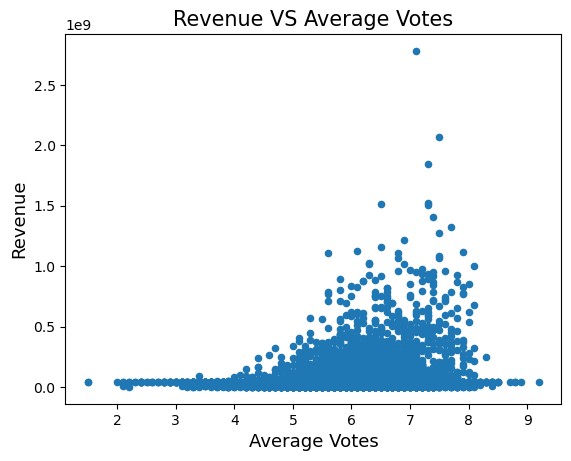

In [53]:
#The code below compare revenue generated to average votes  
df1.plot.scatter(x = 'vote_average', y = 'revenue')
plt.title("Revenue VS Average Votes",fontsize=15)
plt.xlabel('Average Votes',fontsize=13)
plt.ylabel("Revenue",fontsize= 13)

# Conclusions

1. The most popular movie genre is the Drama genre followed by the comedy genre.
2. The top revenue generating movie budget is between 150 million to 300 million.
3. The most popular movie did not generate the highest revenue, so it can be infered that high popuarity is not equal to high revenue.
4. The movie with low average votes generate low revenue, on the other hand, the movied with relative high votes generate more revenue.

# Limitation

1.Though the analysis in the second research question visuliazed how Revenue faired compared to some factors, it is still npt 100% accurate to base your findings on those factors

2.When i was data cleaning process, I splited genres column that contains several values separated by '|' . I keep the first value. 
This increases the time taken in calculating the result